Code to plot 50 random spikes in a patient

In [8]:
#establishing environment
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scipy
from scipy.stats import pearsonr
from scipy import signal as sig
from scipy.io import loadmat, savemat
import random
from ieeg.auth import Session

In [5]:
split_HUP203 = loadmat('/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/Results_v1/split_HUP203_phaseII.mat'); #local machine save #this is 10 gdfs
#structure split into it's respective fields
split = split_HUP203
fs = 512;
chLabels = np.transpose(split['chLabels'])
values = np.transpose(split['values'])
seqs = np.transpose(split['sequences'])
leaders = np.transpose(split['leaders'])
global_coi = np.transpose(split['global_coi'])

In [29]:
np.shape(values)
random.choice((range(len(values))))
print(np.shape(random.choice(values[100,0])))

(513,)


In [52]:
def concat_seqs(I):
    if seqs[I,0].size != 0:
        X = np.concatenate(np.concatenate(seqs[I,0]))
    else:
        X = []
    return X #recreates the GDF from which the sequence was parsed - I can be used to iterate through the whole code

def plot_spikes(values,sequences):
    plot_idx = range(5);
    fig, axs = plt.subplots(len(plot_idx), 2, figsize=(10,10))
    time = np.linspace(0,1,513)
    for i in range(5):
        choice1 = random.choice(range(len(values))) #picks from what run_time to pull from
        choice2 = random.choice(values[choice1,0]) #picks what spike to plot in run_time
        
        choice3 = random.choice(range(len(values))) #picks from what run_time to pull from
        choice4 = random.choice(values[choice3,0]) #picks what spike to plot in run_time
        
        axs[i,0].plot(time, choice2, 'k') #plot nerve data - unfiltered
        axs[i,0].set_ylabel("Voltage (millivolts)")
        axs[i,0].set_xlabel("Time (s)")
        axs[i,0].set_title("Random Spike")
        
        axs[i,1].plot(time, choice4,'k') #plot new axs. 
        axs[i,1].set_ylabel("Voltage (millivolts)")
        axs[i,1].set_xlabel("Time (s)")
        axs[i,1].set_title("Random Spike")

    return

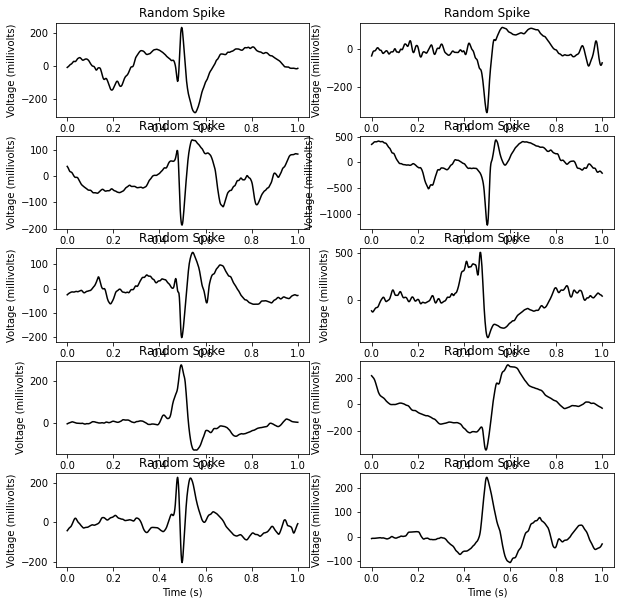

In [53]:
plot_spikes(values,seqs)